# Análise Filtro I

In [411]:
import pandas as pd
import matplotlib.pyplot as plt

# Espectroscopia

# Hb

In [412]:
# Lendo o arquivo.

radvel = pd.read_csv('componentes_hb.txt', sep = ' ', index_col = False)
radvel

,broad,fluxb,equb,fwhmb,narrow,fluxn,equn,fwhmn
0,4863.70,3.430000e-15,-18.57,15.78,4858.01,6.050000e-16,-3.29,4.04
1,4866.18,1.850000e-15,-16.64,18.26,4872.09,1.230000e-15,-11.08,8.70
2,4866.06,3.000000e-15,-22.00,13.81,4857.48,7.240000e-16,-5.38,13.15
3,4860.09,4.470000e-15,-21.17,13.33,4847.21,1.220000e-15,-5.74,15.24
4,4860.15,2.890000e-15,-16.88,15.95,4852.10,1.270000e-15,-7.42,14.02
5,4863.46,3.140000e-15,-23.29,18.03,4857.64,8.520000e-16,-6.33,5.63
6,4866.46,2.610000e-15,-28.26,14.05,4874.95,6.360000e-16,-6.95,21.59
7,4865.40,2.910000e-15,-19.54,11.89,4855.70,9.010000e-16,-6.08,13.92
8,4860.58,3.080000e-15,-15.72,12.25,4849.55,1.560000e-15,-7.99,19.00
9,4863.15,2.880000e-15,-13.11,21.55,4871.29,7.890000e-16,-11.17,6.75


In [413]:
# Calcula as velocidades radiais.

from astropy.constants import c

radvel['radvel_broad']  = ((radvel['broad'] - 4861.35)/4861.35)*(c.to('km/s'))
radvel['radvel_narrow'] = ((radvel['narrow'] - 4861.35)/4861.35)*(c.to('km/s'))

#radvel.sort_values(by = 'fase')

In [414]:
# Coloca o bjd no arquivo.

radvel['time'] = pd.read_csv('hjd_espectros.txt')

In [415]:
# Calculo da fase

radvel['fase'] = ((radvel['time'] -2456980.6726) /0.07918 ) % 1

# Duplica a fase.

radvel1 = radvel.copy()
radvel1['fase'] = radvel1['fase'] + 1
radvel = pd.concat([radvel, radvel1], ignore_index=True)

radvel.sort_values('fase')

,broad,fluxb,equb,fwhmb,narrow,fluxn,equn,fwhmn,radvel_broad,radvel_narrow,time,fase
16,4863.23,1.780000e-15,-19.63,12.93,4870.53,4.700000e-16,-5.15,14.43,115.936894,566.117388,2.456983e+06,0.063916
11,4866.24,2.090000e-15,-13.92,9.07,4857.22,1.290000e-15,-8.64,12.24,301.559262,-254.691156,2.456983e+06,0.079649
7,4865.40,2.910000e-15,-19.54,11.89,4855.70,9.010000e-16,-6.08,13.92,249.757671,-348.427368,2.456981e+06,0.093917
2,4866.06,3.000000e-15,-22.00,13.81,4857.48,7.240000e-16,-5.38,13.15,290.458921,-238.657330,2.456981e+06,0.098506
17,4861.50,2.760000e-15,-18.04,10.99,4848.35,7.080000e-16,-3.11,12.06,9.250284,-801.691290,2.456983e+06,0.198781
12,4861.29,2.100000e-15,-18.12,10.69,4848.15,5.030000e-16,-4.34,10.48,-3.700114,-814.025002,2.456983e+06,0.214499
8,4860.58,3.080000e-15,-15.72,12.25,4849.55,1.560000e-15,-7.99,19.00,-47.484792,-727.689017,2.456981e+06,0.272612
3,4860.09,4.470000e-15,-21.17,13.33,4847.21,1.220000e-15,-5.74,15.24,-77.702387,-871.993450,2.456981e+06,0.278051
18,4856.68,3.100000e-15,-19.73,11.86,4848.01,8.120000e-16,-1.26,5.31,-287.992179,-822.658601,2.456983e+06,0.333625
4,4860.15,2.890000e-15,-16.88,15.95,4852.10,1.270000e-15,-7.42,14.02,-74.002273,-570.434187,2.456981e+06,0.456744


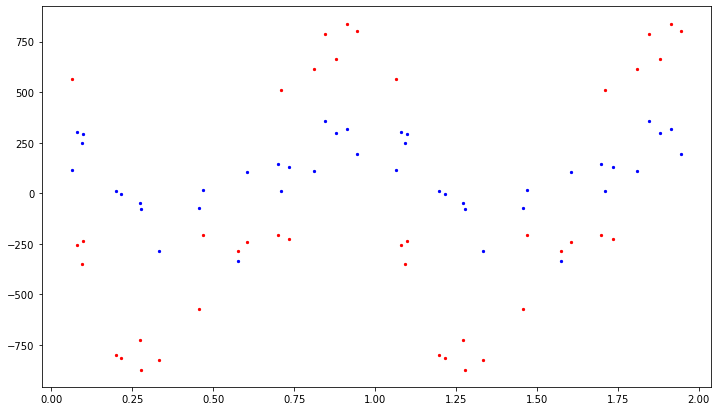

In [416]:
#Plota o gráfico das velocidades radiais.

f, ax = plt.subplots(figsize=(12,7))

plt.scatter(radvel['fase'], radvel['radvel_broad'], color = 'blue',s = 5)
plt.scatter(radvel['fase'], radvel['radvel_narrow'], color = 'red', s = 5)

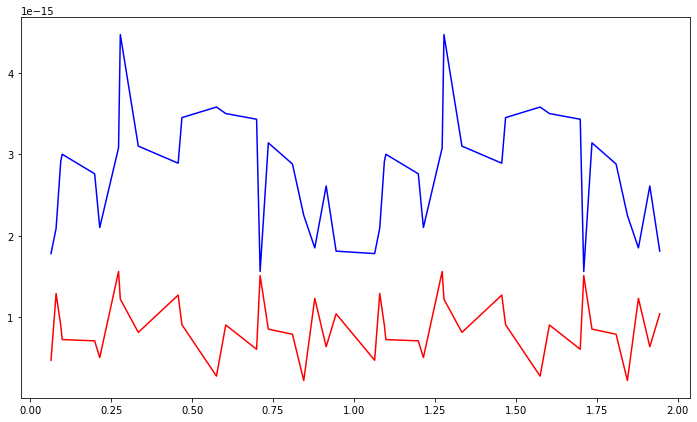

In [388]:
# Plota os gráficos do fluxo.

f, ax = plt.subplots(figsize=(12,7))

radvel = radvel.sort_values(by = 'fase')

plt.plot(radvel['fase'], radvel['fluxb'], color = 'blue')
plt.plot(radvel['fase'], radvel['fluxn'], color = 'red')

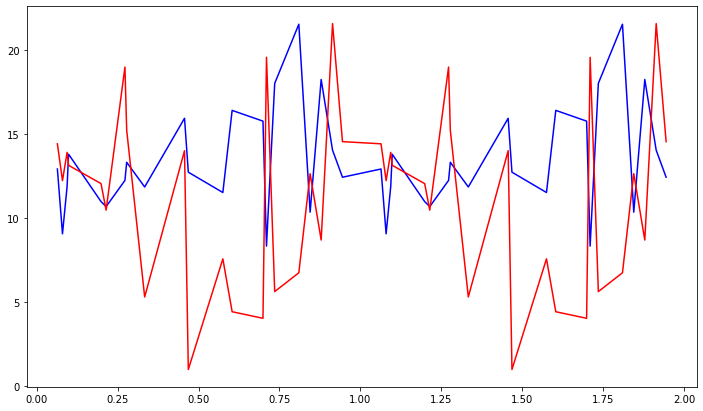

In [389]:
# Plota os Gráficos da largura a meia altura.

f, ax = plt.subplots(figsize=(12,7))


plt.plot(radvel['fase'], radvel['fwhmb'], color = 'blue')
plt.plot(radvel['fase'], radvel['fwhmn'], color = 'red')

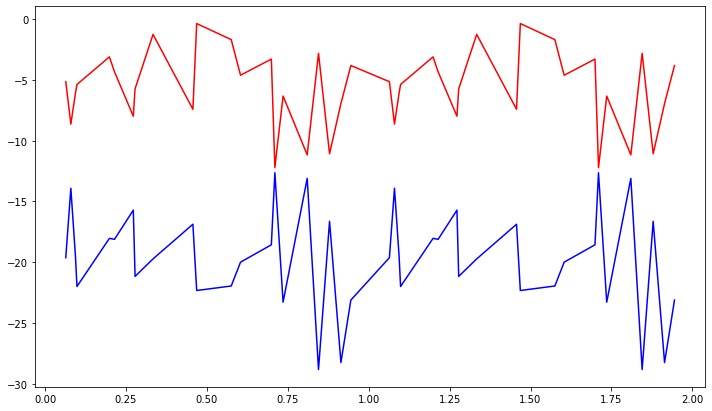

In [390]:
# Plota os gráficos da largura equivalente.

f, ax = plt.subplots(figsize=(12,7))


plt.plot(radvel['fase'], radvel['equb'], color = 'blue')
plt.plot(radvel['fase'], radvel['equn'], color = 'red')

## HeII

In [517]:
# Lendo o arquivo.

radvel = pd.read_csv('he_II _cor.txt', sep = ' ', index_col = False)
radvel

,broad,fluxb,equb,fwhmb,narrow,fluxn,equn,fwhmn
0,4684.75,1.720000e-15,-10.78,7.68,4693.15,1.560000e-15,-9.74,15.74
1,4687.60,1.030000e-15,-6.60,10.31,4698.23,4.740000e+00,-13.42,6.29
2,4689.18,2.560000e-15,-21.11,11.63,4678.90,2.630000e-16,-2.20,9.96
3,4682.94,2.730000e-15,-13.84,10.69,4671.31,6.940000e-16,-3.56,7.14
4,4678.59,1.820000e-15,-11.29,8.37,4685.69,7.030000e-16,-4.31,5.08
5,4684.33,2.270000e-15,-21.96,11.49,4698.44,1.380000e-15,-13.29,26.30
6,4691.52,1.990000e-15,-23.09,9.04,4689.35,4.420000e-16,-5.05,28.67
7,4688.62,2.030000e-15,-15.34,9.97,4679.64,4.220000e-16,-3.27,11.78
8,4682.74,2.210000e-15,-12.30,10.31,4671.71,5.540000e-16,-3.13,6.42
9,4684.70,2.650000e-15,-20.86,13.24,4699.49,4.620000e-16,-3.59,13.48


In [525]:
# Calcula as velocidades radiais.

from astropy.constants import c

radvel['radvel_broad']  = ((radvel['broad'] - 4685.71)/4685.71)*(c.to('km/s'))
radvel['radvel_narrow'] = ((radvel['narrow'] - 4685.71)/4685.71)*(c.to('km/s'))

radvel

,broad,fluxb,equb,fwhmb,narrow,fluxn,equn,fwhmn,radvel_broad,radvel_narrow,time,fase
16,4686.29,1.080000e-15,-13.05,8.18,4693.02,5.600000e-16,-6.71,7.29,37.108491,467.694942,2.456983e+06,0.090438
11,4689.12,1.100000e-15,-8.22,8.19,4679.37,9.050000e-16,-6.86,13.26,218.172333,-405.634191,2.456983e+06,0.106171
7,4688.62,2.030000e-15,-15.34,9.97,4679.64,4.220000e-16,-3.27,11.78,186.182255,-388.359549,2.456981e+06,0.120438
2,4689.18,2.560000e-15,-21.11,11.63,4678.90,2.630000e-16,-2.20,9.96,222.011142,-435.704864,2.456981e+06,0.125028
17,4684.47,1.070000e-15,-9.35,8.25,4673.55,4.210000e-16,-5.22,9.45,-79.335394,-777.998700,2.456983e+06,0.225303
12,4684.55,9.760000e-16,-9.52,8.05,4673.21,4.320000e-16,-4.29,7.98,-74.216981,-799.751953,2.456983e+06,0.241021
8,4682.74,2.210000e-15,-12.30,10.31,4671.71,5.540000e-16,-3.13,6.42,-190.021064,-895.722188,2.456981e+06,0.299134
3,4682.94,2.730000e-15,-13.84,10.69,4671.31,6.940000e-16,-3.56,7.14,-177.225033,-921.314250,2.456981e+06,0.304573
18,4681.16,1.540000e-15,-10.18,7.09,4673.71,5.050000e-16,-3.63,7.18,-291.109711,-767.761875,2.456983e+06,0.360147
4,4678.59,1.820000e-15,-11.29,8.37,4685.69,7.030000e-16,-4.31,5.08,-455.538713,-1.279603,2.456981e+06,0.483266


In [526]:
# Coloca o bjd no arquivo.

radvel['time'] = pd.read_csv('hjd_espectros.txt')

In [527]:
# Calculo da fase

radvel['fase'] = ((radvel['time'] - 2456980.6705) /0.07918 ) % 1

# Duplica a fase.

radvel1 = radvel.copy()
radvel1['fase'] = radvel1['fase'] + 1
radvel = pd.concat([radvel, radvel1], ignore_index=True)

In [528]:
radvel.sort_values('fase')

,broad,fluxb,equb,fwhmb,narrow,fluxn,equn,fwhmn,radvel_broad,radvel_narrow,time,fase
0,4686.29,1.080000e-15,-13.05,8.18,4693.02,5.600000e-16,-6.71,7.29,37.108491,467.694942,2.456983e+06,0.090438
1,4689.12,1.100000e-15,-8.22,8.19,4679.37,9.050000e-16,-6.86,13.26,218.172333,-405.634191,2.456983e+06,0.106171
2,4688.62,2.030000e-15,-15.34,9.97,4679.64,4.220000e-16,-3.27,11.78,186.182255,-388.359549,2.456981e+06,0.120438
3,4689.18,2.560000e-15,-21.11,11.63,4678.90,2.630000e-16,-2.20,9.96,222.011142,-435.704864,2.456981e+06,0.125028
4,4684.47,1.070000e-15,-9.35,8.25,4673.55,4.210000e-16,-5.22,9.45,-79.335394,-777.998700,2.456983e+06,0.225303
...,...,...,...,...,...,...,...,...,...,...,...,...
79,4684.70,2.650000e-15,-20.86,13.24,4699.49,4.620000e-16,-3.59,13.48,-64.619958,881.646553,NaN,NaN
80,4691.06,1.570000e-15,-22.29,6.72,4697.34,3.220000e-16,-4.48,9.49,342.293836,744.089217,NaN,NaN
81,4687.60,1.030000e-15,-6.60,10.31,4698.23,4.740000e+00,-13.42,6.29,120.922495,801.031556,NaN,NaN
82,4691.52,1.990000e-15,-23.09,9.04,4689.35,4.420000e-16,-5.05,28.67,371.724708,232.887769,NaN,NaN


In [529]:
radvel.sort_values('fase')

,broad,fluxb,equb,fwhmb,narrow,fluxn,equn,fwhmn,radvel_broad,radvel_narrow,time,fase
0,4686.29,1.080000e-15,-13.05,8.18,4693.02,5.600000e-16,-6.71,7.29,37.108491,467.694942,2.456983e+06,0.090438
1,4689.12,1.100000e-15,-8.22,8.19,4679.37,9.050000e-16,-6.86,13.26,218.172333,-405.634191,2.456983e+06,0.106171
2,4688.62,2.030000e-15,-15.34,9.97,4679.64,4.220000e-16,-3.27,11.78,186.182255,-388.359549,2.456981e+06,0.120438
3,4689.18,2.560000e-15,-21.11,11.63,4678.90,2.630000e-16,-2.20,9.96,222.011142,-435.704864,2.456981e+06,0.125028
4,4684.47,1.070000e-15,-9.35,8.25,4673.55,4.210000e-16,-5.22,9.45,-79.335394,-777.998700,2.456983e+06,0.225303
...,...,...,...,...,...,...,...,...,...,...,...,...
79,4684.70,2.650000e-15,-20.86,13.24,4699.49,4.620000e-16,-3.59,13.48,-64.619958,881.646553,NaN,NaN
80,4691.06,1.570000e-15,-22.29,6.72,4697.34,3.220000e-16,-4.48,9.49,342.293836,744.089217,NaN,NaN
81,4687.60,1.030000e-15,-6.60,10.31,4698.23,4.740000e+00,-13.42,6.29,120.922495,801.031556,NaN,NaN
82,4691.52,1.990000e-15,-23.09,9.04,4689.35,4.420000e-16,-5.05,28.67,371.724708,232.887769,NaN,NaN


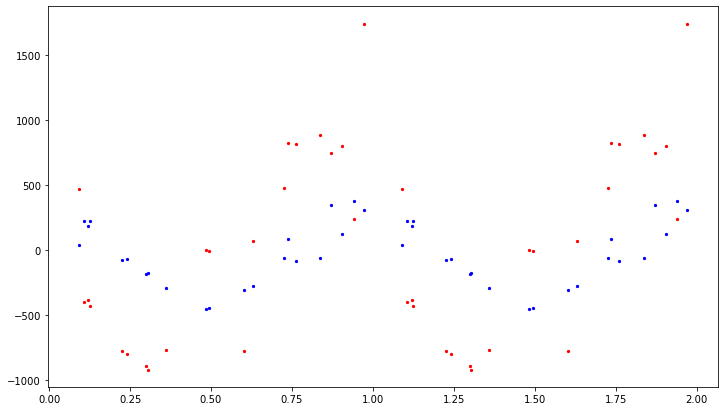

In [530]:
#Plota o gráfico das velocidades radiais.

f, ax = plt.subplots(figsize=(12,7))

plt.scatter(radvel['fase'], radvel['radvel_broad'], color = 'blue',s = 5)
plt.scatter(radvel['fase'], radvel['radvel_narrow'], color = 'red', s = 5)

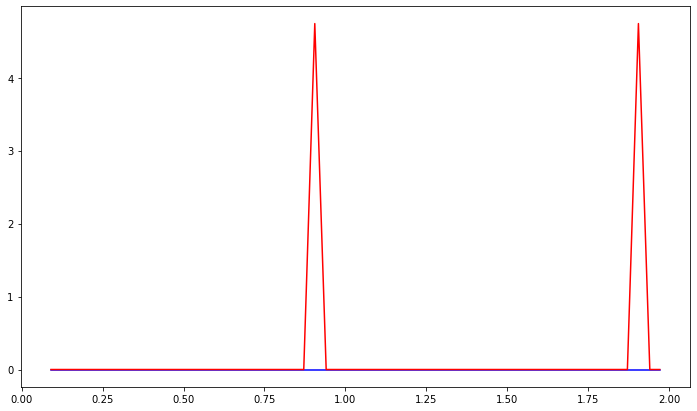

In [531]:
# Plota os gráficos do fluxo.

f, ax = plt.subplots(figsize=(12,7))

radvel = radvel.sort_values(by = 'fase')

plt.plot(radvel['fase'], radvel['fluxb'], color = 'blue')
plt.plot(radvel['fase'], radvel['fluxn'], color = 'red')

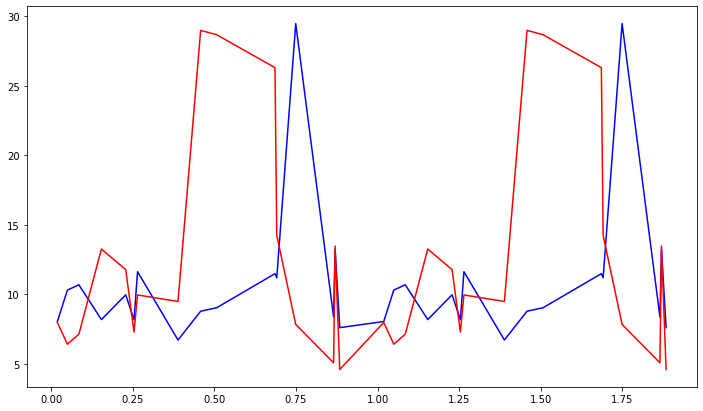

In [133]:
# Plota os Gráficos da largura a meia altura.

f, ax = plt.subplots(figsize=(12,7))


plt.plot(radvel['fase'], radvel['fwhmb'], color = 'blue')
plt.plot(radvel['fase'], radvel['fwhmn'], color = 'red')

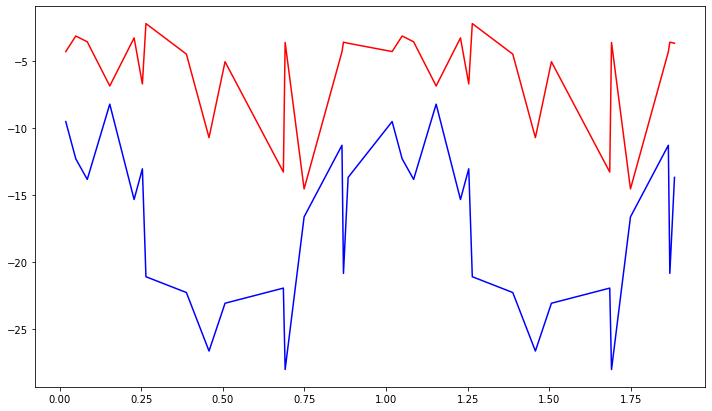

In [134]:
# Plota os gráficos da largura equivalente.

f, ax = plt.subplots(figsize=(12,7))


plt.plot(radvel['fase'], radvel['equb'], color = 'blue')
plt.plot(radvel['fase'], radvel['equn'], color = 'red')

# Polarização

In [148]:
# Lê o arquivo.

pol = pd.read_csv('pol_nfase_bjd.txt', sep = ' ')

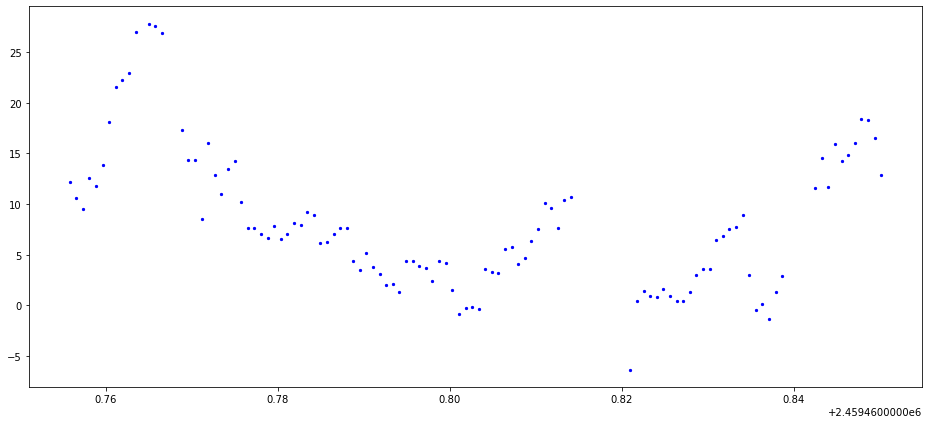

In [149]:
# PLota o gráfico em função de bjd.

f, ax = plt.subplots(figsize=(16,7))

plt.scatter(pol['bjd'], pol['circ_pol'], color = 'blue', s=5)

In [150]:
# Calcula a fase.

pol['fase'] = ((pol['bjd'] - 255155.3658)/0.07918) % 1

# Duplica a fase.

pol1 = pol.copy()
pol1['fase'] = pol1['fase'] + 1
pol = pd.concat([pol, pol1], ignore_index=True)

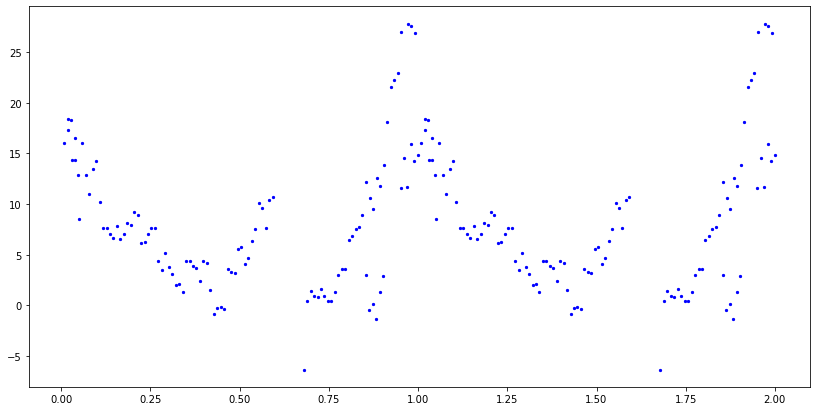

In [151]:
# PLota pol em função da fase.

f, ax = plt.subplots(figsize=(14,7))
plt.scatter(pol['fase'], pol['circ_pol'], color = 'blue', s=5)

# Curva de Luz

In [51]:
luz = pd.read_csv('curva_de_luz_fase.txt', sep = ' ')

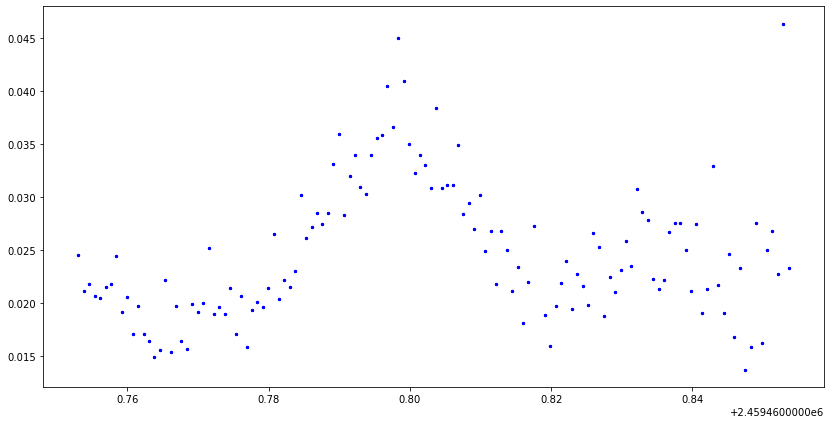

In [60]:
f, ax = plt.subplots(figsize=(14,7))
plt.scatter(luz['bjd'], luz['mag'], color = 'blue', s=5)

In [58]:
luz['fase'] = ((255155.3658 - luz['bjd'])/0.07918) % 1
luz1 = luz.copy()
luz1['fase'] = luz1['fase'] + 1
luz = pd.concat([luz, luz1], ignore_index=True)


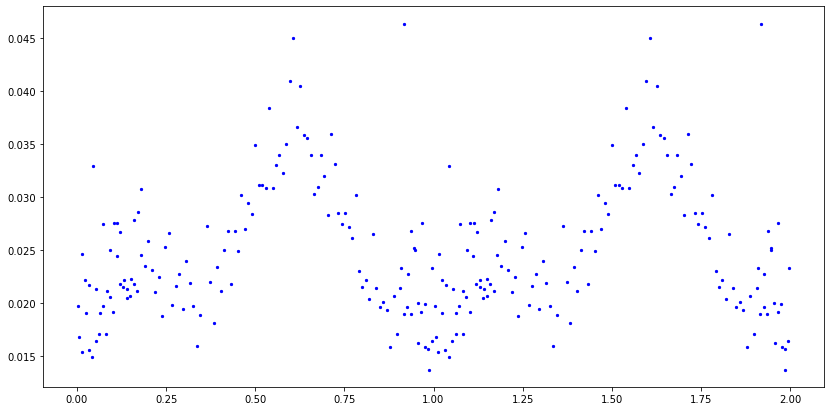

In [59]:
f, ax = plt.subplots(figsize=(14,7))
plt.scatter(luz['fase'], luz['mag'], color = 'blue', s=5)